<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/04_DeepLearning/02_NeuralNetwork_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a classification model from scratch

- Aim is to classify the [MNSIT data](https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv) [0-9]
1.   Import libraries and create data
2.   Define functions
3.   Training, testing







## Importing libraries and crating data


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
training_data=np.array(pd.read_csv('/content/train.csv')) #storing the data in form of an array
testing_data=np.array(pd.read_csv('/content/test.csv'))

np.random.shuffle(training_data)
np.random.shuffle(testing_data) # shuffling data to avoid overfitting the model ie. the model might learn from order

In [9]:
print(training_data.shape) #it consists of 42000 image samples {rows} each image is of 28*28 pixels=784 + first column consisting labels = 785
print(testing_data.shape) # the testing data consists of 28000 samples of images {rows} of 28*28pixels each {column} no label

(42000, 785)
(28000, 784)


In [10]:
training_data=training_data.T   #transposing the array , now the rows represent pixels and columns represent images

testing_data=testing_data.T
print(f"training data {training_data.shape} | testing data {testing_data.shape}")

training data (785, 42000) | testing data (784, 28000)


In [11]:
x_train=training_data[1:]/255 #normalised by dividing - 0 represent black and 1 represent white
y_train=training_data[0] #the first row ie lables
x_test=testing_data/255

In [12]:
x_train.shape,y_train.shape,x_test.shape

((784, 42000), (42000,), (784, 28000))

In [13]:
x_train[:5], y_train[:5]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 2, 9, 0, 1]))

In [14]:
x_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

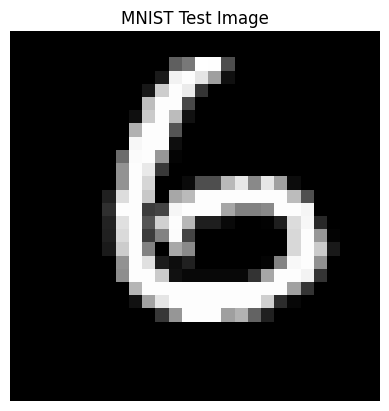

In [43]:
import matplotlib.pyplot as plt

# take first image from test set
img=x_test.transpose()
image = img[152].reshape(28, 28)   # reshape 784 → 28x28 for plotting

plt.imshow(image, cmap="gray")
plt.title("MNIST Test Image")
plt.axis("off")
plt.show()

## Define functions

In [15]:
# Initialisng parameters

def initialize_params():
  W1=np.random.randn(10,784)*0. # Each of the 10 neurons in layer 1 needs 784 weights (one per input pixel).
  b1=np.random.randn(10,1)*0.01
  W2=np.random.randn(10,10)*0.01
  b2=np.random.randn(10,1)*0.01

  return W1,b1,W2,b2

In [16]:
# normalisation

def normalise(x):
  mean=np.mean(x)
  std=np.std(x)

  return (x-mean)/std

In [17]:
# ReLU activation function

def relu(x):
    return np.maximum(0,x) #returns x if x i spositive else returns zero

In [18]:
# backpropogation, ReLU derivative

def relu_derivative(x):
  return x>0

In [19]:
# softmax activation function

def softmax(Z):
  Z=Z-np.max(Z,axis=0)
  A= np.exp(Z)/np.sum(np.exp(Z),axis=0)

  return A

In [20]:
# encoder

def one_hot_encoder(y):  #if y=[0,1,2,1]
  one_hot_y=np.zeros((y.size,y.max()+1)) #this initialises an array of four rows and three columns
  one_hot_y[np.arange(y.size),y]=1 #one_hot_u[0,0]=1 then [1,1]=1 then [2,2]=1 then [3,1]=1
  one_hot_y=one_hot_y.T #transforms the hot encoded array

  return one_hot_y

In [21]:
# forward pass

def forward_propagation(w1,b1,w2,b2,X):
    Z1= w1.dot(X) + b1 #first layer of ten units
    A1=relu(Z1)         #activation function introduces non linearity

    Z2 = w2.dot(A1) + b2  #second hidden layer of ten units
    A2=softmax(Z2)        #second activation fn softmax converts into probability

    return Z1,A1,Z2,A2

In [22]:
#back propogation
def backward_propagation(Z1, A1, Z2, A2, w1, w2, X, Y):
    one_hot_Y = one_hot_encoder(Y)  # Convert labels to one-hot encoding
    m=X.shape[1]
    dZ2 = A2 - one_hot_Y          # Gradient of the loss wrt Z2
    dW2 = 1 / m * dZ2.dot(A1.T)     # Gradient of the loss wrt w2
    db2 = 1 / m * np.sum(dZ2, 1).reshape(-1, 1)  # Gradient of the loss wrt b2

    dZ1 = w2.T.dot(dZ2) * relu_derivative(Z1)  # Gradient wrt Z1 (backprop through w2)
    dW1 = 1 / m * dZ1.dot(X.T)      # Gradient of the loss wrt w1
    db1 = 1 / m * np.sum(dZ1, 1).reshape(-1, 1)  # Gradient wrt b1

    return dW1, db1, dW2, db2

In [23]:
def update_paramameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))
    return W1, b1, W2, b2

In [24]:
def get_predictions(A2):
    return np.argmax(A2, 0) #argmax gives labels from probabilites

In [25]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size #calculates TP+TN/ TP+TN+FP+FN

In [26]:
def optimiser(X, Y, lr, iterations):
    W1, b1, W2, b2 = initialize_params()  # 1.initialise parameters two layers
    for i in range(iterations): # 2.train the model
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X) #calculate predictions by using relu and softmax activation function
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y) #calculate loss and gradients
        W1, b1, W2, b2 = update_paramameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr) #update the parameters
        if i % 100 == 0:
            print("Epoch: ", i)
            predictions = get_predictions(A2) #get predictions using argmax
            print(get_accuracy(predictions, Y)) #print results
    return W1, b1, W2, b2

## Testing


In [27]:
W1,b1,W2,b2 = optimiser(x_train,y_train,0.1,1000)

Epoch:  0
[0 0 0 ... 0 0 0] [0 2 9 ... 1 8 0]
0.09838095238095237
Epoch:  100
[0 2 9 ... 3 0 0] [0 2 9 ... 1 8 0]
0.4267619047619048
Epoch:  200
[0 2 4 ... 2 2 0] [0 2 9 ... 1 8 0]
0.7561666666666667
Epoch:  300
[0 2 4 ... 2 2 0] [0 2 9 ... 1 8 0]
0.8163333333333334
Epoch:  400
[0 2 4 ... 2 2 0] [0 2 9 ... 1 8 0]
0.8423809523809523
Epoch:  500
[0 2 4 ... 2 2 0] [0 2 9 ... 1 8 0]
0.8566428571428572
Epoch:  600
[0 2 9 ... 2 2 0] [0 2 9 ... 1 8 0]
0.8662857142857143
Epoch:  700
[0 2 9 ... 2 2 0] [0 2 9 ... 1 8 0]
0.8729523809523809
Epoch:  800
[0 2 9 ... 2 8 0] [0 2 9 ... 1 8 0]
0.8790238095238095
Epoch:  900
[0 2 9 ... 2 8 0] [0 2 9 ... 1 8 0]
0.8842619047619048


In [28]:
def predict(w1, b1, w2, b2, X):
    _, _, _, A2 = forward_propagation(w1, b1, w2, b2, X)
    predictions = np.argmax(A2, axis=0)   # pick the class with highest prob
    return predictions

In [30]:
y_pred = predict(W1, b1, W2, b2, x_test)

In [31]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(y_pred)+1),
    "Label": y_pred
})

submission.to_csv("submission.csv", index=False)